In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

from matplotlib import pyplot as plt

# 1. Загрузите датасет taxi.csv.

In [2]:
data = pd.read_csv('taxi.csv')

In [3]:
data.head().T

,0,1,2,3,4
offer_gk,1105373,759733,416977,889660,1120055
weekday_key,5,5,6,2,4
hour_key,20,14,14,6,16
driver_gk,6080,6080,6080,6080,6080
order_gk,174182,358774,866260,163522,506710
driver_latitude,55.8188,55.8053,55.814,55.7459,55.8036
driver_longitude,37.3346,37.515,37.3477,37.4217,37.5216
origin_order_latitude,55.8146,55.8193,55.8148,55.7435,55.8126
origin_order_longitude,37.355,37.4664,37.3541,37.4311,37.5274
distance_km,-1,18.802,6.747,-1,12.383


# 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


По результатам info очевидно, что в датасете нет пропусков. Большинство данных числовые, и только два признака категориальные: offer_class_group и ride_type_desc

In [5]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


По результатам describe видно, что признаки обозначающие день недели и час weekday_key и hour_key, начинаются с нуля. Понедельник - это 0 день недели, вторник 2 и тд., а час представлен в 24 часовом формате.

Признаки distance_km и duration_min - дальность и время поездки. Они важны, тк непрерывные и напрямую влияют на стоимость поездки (не представлена в датасете) и соответвенно на решение таксиста взять заказ. Максимальное значение расстояния - 5234 км, что является выбросом, а максимальное время - 3958 минут или 66 часов, наверняка тоже является выбросом. Скорее всего из-за этого выброса стандартное отклонение в два раза выше среднего значения для дальности и времени поездки.

В признаках driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude присутствует значение -1, что может означать, что координаты водителя и/или заказа отсутствовали в момент заказа.

In [6]:
data.offer_gk.unique().size

100000

In [7]:
data.order_gk.unique().size

81435

In [8]:
data.ride_type_desc.unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

offer_gk - id оффера (заказа) и датасет содержит 10 000 уникальных записей этого признака;
weekday_key - ключ дня недели, от 0 до 6;
hour_key - ключ часа, от 0 до 23;
driver_gk - id водителя;
order_gk - id пользователя сделавшего заказ;
driver_latitude - широта водителя в момент поступления заказа;
driver_longitude - долгота водителя в момент поступления заказа;
origin_order_latitude - широта заказа;
origin_order_longitude - долгота заказа;
distance_km - дистанция до финальной точки заказа;
duration_min - время до финальной точки заказа;
offer_class_group - тип обслуживания заказа (эконом, стандарт и тд);
ride_type_desc - тип заказа:
   *private - обычная поездка;
   *business - поездка оплачиваемая юр лицом;
   *affiliate - поездка обслуживаемая аффилированной компанией;
   *SMB - возможно, small and medium businesses, тоже бизнес поездка;
driver_response - ответ водителя:
   *1 - взял закза
   *0 - не взял заказ

# 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

В п.2 (info) и п.4 (profile_report) проверено, что пропусков нет.

Но есть значения "-1" в следующих колонках: driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude, distance_km, duration_min.

In [9]:
data[data.driver_latitude < 0]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,-1.000,-1.000,Standard,business,1
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923,81.350,Standard,business,1
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529,65.000,Standard,business,1
2145,845726,6,0,6792,552732,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1
2183,177029,0,17,6792,658177,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1
2191,10275,3,11,6792,92302,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1
2221,1039638,5,22,6792,378336,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1
2268,378336,1,11,6792,354709,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1


Посчитаем, что минусовое значение может появляться, когда координаты водителя совпадают с координатами пассажира, то есть заказ принимается на улице, когда пассажир подошел к машине

In [10]:
minus_coord = data[data.driver_latitude < 1].index
data.loc[minus_coord,"driver_latitude"] = data.loc[minus_coord,"origin_order_latitude" ]
data.loc[minus_coord,"driver_longitude"] = data.loc[minus_coord,"origin_order_longitude" ]

In [11]:
# Проверим, что -1 нет
data[data.driver_latitude < 0]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response


In [12]:
data[data.origin_order_longitude < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1687,760201,6,17,1479,217451,55.730637,37.491326,-1.0,-1.0,2.942,6.300,Economy,private,1
9407,729617,1,21,1835,404650,55.484133,37.850971,-1.0,-1.0,-1.000,-1.000,Standard,private,0
43328,1033378,3,10,5586,386108,55.762383,37.772572,-1.0,-1.0,14.127,21.433,Economy,private,1
43688,299807,3,18,14,69484,55.640164,37.534014,-1.0,-1.0,9.998,22.133,Standard,private,1
51365,833482,0,20,75,782429,55.619920,37.395172,-1.0,-1.0,28.607,32.967,Economy,private,0
56004,1009826,3,19,4185,247078,55.758792,37.749308,-1.0,-1.0,11.281,21.167,Economy,private,1
58769,212838,2,7,6304,542162,55.638462,37.335678,-1.0,-1.0,48.557,47.300,Economy,private,0
60245,753313,1,16,1168,583148,55.984804,37.159184,-1.0,-1.0,-1.000,-1.000,Economy,private,1
64117,936069,5,15,737,139197,55.753351,37.667157,-1.0,-1.0,2.252,7.400,Standard,private,1
64694,1095202,3,20,5669,659570,55.741113,37.618121,-1.0,-1.0,7.199,20.200,Premium,private,1


Причина, как и в кейсе выше.

In [13]:
minus_pass_coord = data[data.origin_order_longitude == -1].index
data.loc[minus_pass_coord,"origin_order_latitude"] = data.loc[minus_pass_coord,"driver_latitude" ]
data.loc[minus_pass_coord,"origin_order_longitude"] = data.loc[minus_pass_coord,"driver_longitude" ]

In [14]:
# Проверим, что -1 нет
data[data.origin_order_longitude < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response


Cтроки с отрицательным значением по расстоянию и времени оставляем пока без изменений.

# 4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

In [15]:
data.profile_report()

В profile report, как и в info видим, что в датасете отсутствуют пропуски.

У признаков distance_km и duration_min очень высокая корреляция - 0.9770. При построении модели один из этих признаков можно будет исключить, так как он не добавляет полезной информации.

У признаков distance_km, duration_min, driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude наблюдается большой перекос в распределении, так как у всех этих признаков есть много полей равных -1, которое отличается от среднего значения распределения.

Признак offer_class_group содержит 9 различных категорий. Это много, в случае, если придется использовать onehot encoding, чтобы превратить признак в вид читаемый машиной, но не критично много.

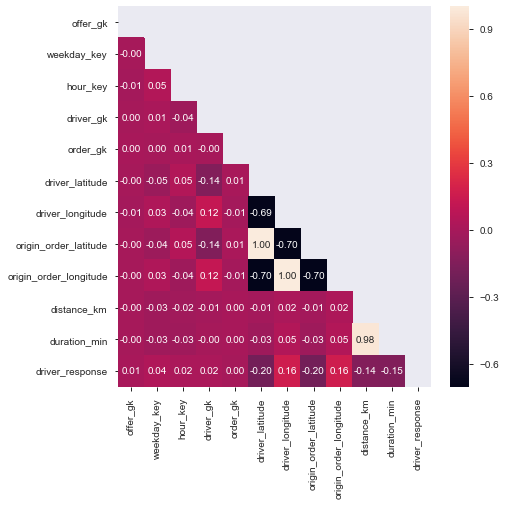

In [16]:
corrmat = data.corr()

plt.figure(figsize=(7, 7))

mask = np.triu(np.ones((len(corrmat), len(corrmat))), k=0)

sns.heatmap(corrmat, annot = True, mask = mask,
            xticklabels=corrmat.columns.values,
            yticklabels=corrmat.columns.values,
           fmt = ".2f"
           )
plt.show()

# 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

Нужно преоборазовать категориальные offer_class_group и ride_type_desc признаки в формат приемлемый для модели. Так как мы будем использовать RandomForestClassifier, то необязательно использовать one hot encoding, нужно простро преобразовать string в int.

In [17]:
def converter(series):
    unique = series.unique().tolist()
    new_series = []
    
    for i in series.index:
        val = unique.index(series.loc[i])
        new_series.append(val)
        
    return new_series

In [18]:
data_clean = data
offer_class_group_int = converter(data_clean.offer_class_group)
data_clean['offer_class_group_int'] = offer_class_group_int

ride_type_desc_int = converter(data_clean.ride_type_desc)
data_clean['ride_type_desc_int'] = ride_type_desc_int

In [19]:
data_clean.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_int,ride_type_desc_int
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,0,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,1,0
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,0,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,0,0
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,0,0


Мы преобразовали признаки offer_class_group и ride_type_desc, и теперь можно удалить стобцы с текстовыми значениями.

In [20]:
data_clean = data_clean.drop(['offer_class_group', 'ride_type_desc'], axis=1)
data_clean.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,offer_class_group_int,ride_type_desc_int
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,0,0,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,1,1,0
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,0,0,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,1,0,0
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,0,0


# 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

Предположим, что мы рассматриваем данные для города и его пригродов, а также, что таксист не может ехать больше одного дня. Таким образом мы оставим данные о поездках меньше 1000 км.

In [21]:
data[data.distance_km < 1000].describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,offer_class_group_int,ride_type_desc_int
count,9.998200e+04,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,5.662511e+05,3.159869,13.827709,3446.387850,460860.557570,55.780505,37.546966,55.779818,37.546645,18.011700,22.852619,0.492419,0.676092,0.090906
std,3.259382e+05,2.054237,7.306604,2038.718373,266066.720133,0.154211,0.157389,0.156456,0.160214,23.500445,22.631078,0.499945,1.030482,0.298805
min,4.000000e+00,0.000000,0.000000,14.000000,18.000000,55.327636,36.984771,55.327917,36.994072,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,2.856240e+05,1.000000,8.000000,1421.000000,229181.500000,55.708777,37.413497,55.708092,37.407117,-1.000000,-1.000000,0.000000,0.000000,0.000000
50%,5.657415e+05,3.000000,16.000000,3507.000000,462417.500000,55.772949,37.534014,55.772562,37.532547,10.404500,19.700000,0.000000,1.000000,0.000000
75%,8.487568e+05,5.000000,20.000000,5242.000000,690894.000000,55.960685,37.624532,55.962007,37.624377,30.632000,37.850000,1.000000,1.000000,0.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.311121,38.280547,56.311121,38.243608,987.373000,713.317000,1.000000,8.000000,3.000000


Датасет уменьшился всего на 18 значений (~0.02%), а среднее отклонение distance_km уменьшилось практически в два раза. Теперь максимальное значение расстояния равное 987 км, а время 713 минутам или 12 часам - адекватное время, которое может потратить таксист, чтобы довезти клиента в другой город.

In [22]:
data_clean = data_clean[data.distance_km < 1000]

Теперь уберем из датасета ненужные признаки. Признаки offer_gk, driver_gk и order_gk, id заказа, id водителя и id пользователя не влияют на решение водителя взять заказ, как по смыслу - для водителя важны расстояние до клиента и длительность поездки, так и математически - у них практически 0 корреляция с признаком driver_response.

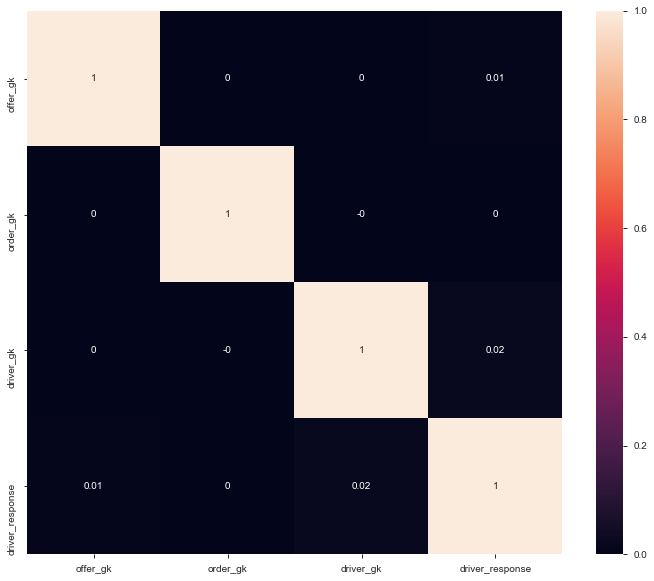

In [23]:
correlation_matrix = data_clean[['offer_gk', 'order_gk', 'driver_gk', 'driver_response']].corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [24]:
data_clean = data_clean.drop(['offer_gk', 'order_gk', 'driver_gk'], axis=1)
data_clean.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,offer_class_group_int,ride_type_desc_int
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,0,0,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,1,1,0
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,0,0,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,1,0,0
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,0,0


Теперь обратим внимание на distance_km и duration_min. У этих двух признаков высокая корреляция - 0.96, соответственно нам не нужны оба этих признака для построения модели, так как они оба содержат одинаковую информацию. Поэтому мы удалим признак duration_min из датасета.

In [25]:
correlation_matrix = data_clean[['distance_km', 'duration_min']].corr().round(2)
correlation_matrix

,distance_km,duration_min
distance_km,1.00,0.96
duration_min,0.96,1.00


In [26]:
data_clean = data_clean.drop('duration_min', axis=1)
data_clean.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,driver_response,offer_class_group_int,ride_type_desc_int
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,0,0,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,1,1,0
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,0,0,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,1,0,0
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,1,0,0


Рассмотрим признаки driver_latitude, driver_longitude, origin_order_latitude и origin_order_longitude - координаты водителя и заказа. В текущем формате все четыре признака не дадут модели практически никакой информации. Однако, можно преобразовать эти четыре признака в один - расстояние между водителем и заказом. Этот признак будет более информативным, так как он будет показывать, сколько водителю нужно потратить времени, чтобы принять заказ.

In [27]:
from math import radians, cos, sin, asin, sqrt 

# Функция преобразовывающая координаты в расстояние в км
def distance(lat1, lon1, lat2, lon2): 
      
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # радиус земли в км.
    r = 6371
       
    # вычисление результата 
    return(c * r)

In [28]:
distance_to_order = []

for i in data_clean.index:
    lat1 = data_clean.loc[i, 'driver_latitude']
    lon1 = data_clean.loc[i, 'driver_longitude']
    lat2 = data_clean.loc[i, 'origin_order_latitude']
    lon2 = data_clean.loc[i, 'origin_order_longitude']
    distance_to_order.append(distance(lat1, lon1, lat2, lon2))

data_clean['distance_to_order'] = distance_to_order

In [29]:
data_clean.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,driver_response,offer_class_group_int,ride_type_desc_int,distance_to_order
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,0,0,0,1.363045
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,1,1,0,3.413092
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,0,0,0,0.409999
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,1,0,0,0.647472
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,1,0,0,1.062481


Mожно удалить признаки driver_latitude, driver_longitude, origin_order_latitude и origin_order_longitude, так как вся информация, которая в них была теперь содержится в признаке distance_to_order.

In [30]:
data_clean = data_clean.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1)
data_clean.head()

,weekday_key,hour_key,distance_km,driver_response,offer_class_group_int,ride_type_desc_int,distance_to_order
0,5,20,-1.000,0,0,0,1.363045
1,5,14,18.802,1,1,0,3.413092
2,6,14,6.747,0,0,0,0.409999
3,2,6,-1.000,1,0,0,0.647472
4,4,16,12.383,1,0,0,1.062481


In [31]:
train_columns = [x for x in data_clean.columns if x != "driver_response"]
train_columns

['weekday_key',
 'hour_key',
 'distance_km',
 'offer_class_group_int',
 'ride_type_desc_int',
 'distance_to_order']

In [32]:
X = data_clean[train_columns][data_clean.distance_km != -1]
y = data_clean["driver_response"][data_clean.distance_km != -1]

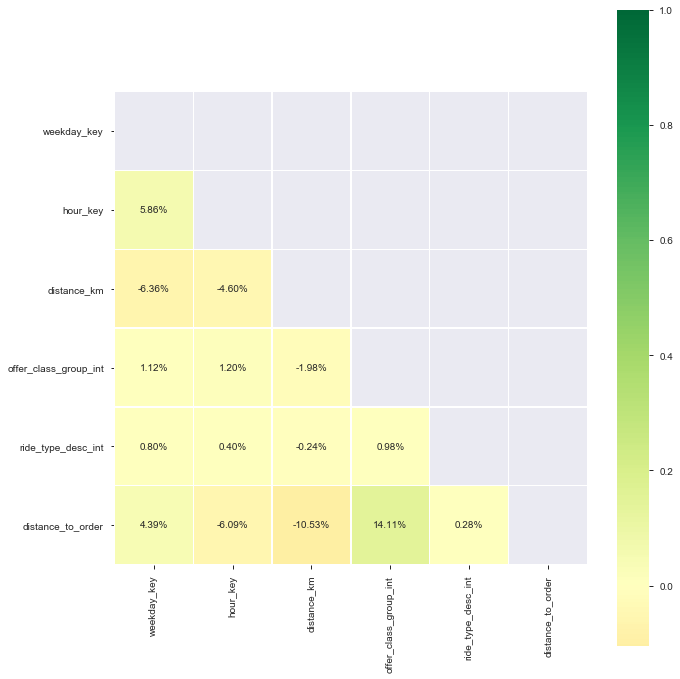

In [34]:
plt.figure(figsize = (10,10))
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', fmt="0.2%", linewidths=0.2, square=True, center=0)
plt.tight_layout()
plt.show()

# 7. Разделите выборку на обучаемую и тестовую.

In [35]:
from sklearn.model_selection import train_test_split

X = data_clean.drop('driver_response', axis=1)
y = data_clean.driver_response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# 8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

headers = list(X_train.columns.values)
feature_imp = pd.Series(clf.feature_importances_,index=headers).sort_values(ascending=False)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.687703155473321


Модель на RandomForestClassifier дала результат с точностью 69% - это хороший результат, который показывает, что параметры были верно преобразованы и остались только необходимые признаки, и их колличество приемлемо.

No handles with labels found to put in legend.


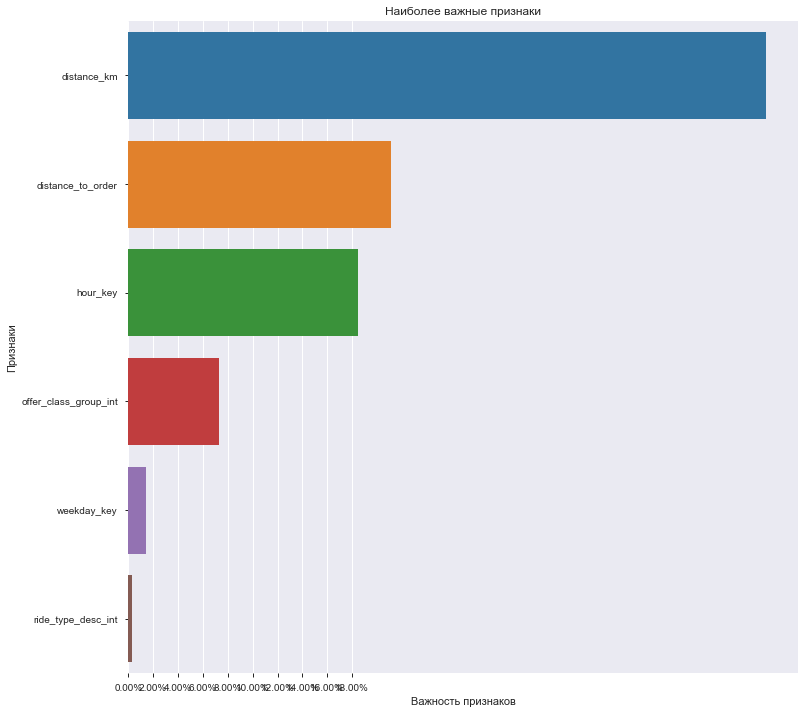

In [37]:
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)

x_ticks = np.linspace(start = 0, stop =0.2, num =  10, endpoint = False)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title("Наиболее важные признаки")
plt.legend()
plt.show()